# PRE-PROCESSAMENTO DAS IMAGENS E AJUSTE DE PASTAS

In [15]:
import os
import glob
import random
import cv2
import shutil

# CRIAR GRID DAS IMAGENS

In [16]:
from matplotlib import pyplot as plt

def showMultipleImages(imgsArray, titlesArray, size, x, y):
    fig, axis = plt.subplots(y, x, figsize=size)
    if len(imgsArray) != x * y:
        print("ERRO: Número incorreto de imagens ou títulos.")
        return
    
    fig.subplots_adjust(hspace=0.5)  # Ajuste o espaçamento vertical entre as imagens
    
    if x == 1 or y == 1:
        fig.suptitle(' '.join(titlesArray), fontsize=20)  # Título global para uma única linha ou coluna
    
    for i, (img, title) in enumerate(zip(imgsArray, titlesArray)):
        ax = axis[i // x, i % x] if y > 1 else axis[i]  # Acessar o eixo correto para cada imagem
        
        ax.imshow(img, cmap='gray')
        ax.set_title(title, fontsize=18, fontweight='medium', pad=10)
        
        ax.axis('off') if len(title) == 0 else None  # Remover eixo se o título estiver vazio
    
    plt.show()

# CARREGANDO IMAGENS DO DIRETORIO

In [17]:
pasta_atual = os.path.abspath(os.getcwd())
pasta_atual

'c:\\Users\\GABRIEL\\OneDrive - alunos.utfpr.edu.br\\CODIGOS\\Rede_Neural\\09'

In [18]:
pasta_original = pasta_atual + "\\dados\\"
pasta_dogs = glob.glob(pasta_original + 'dog.*')

## Exibir 9 imagens de cachorros aleatórias

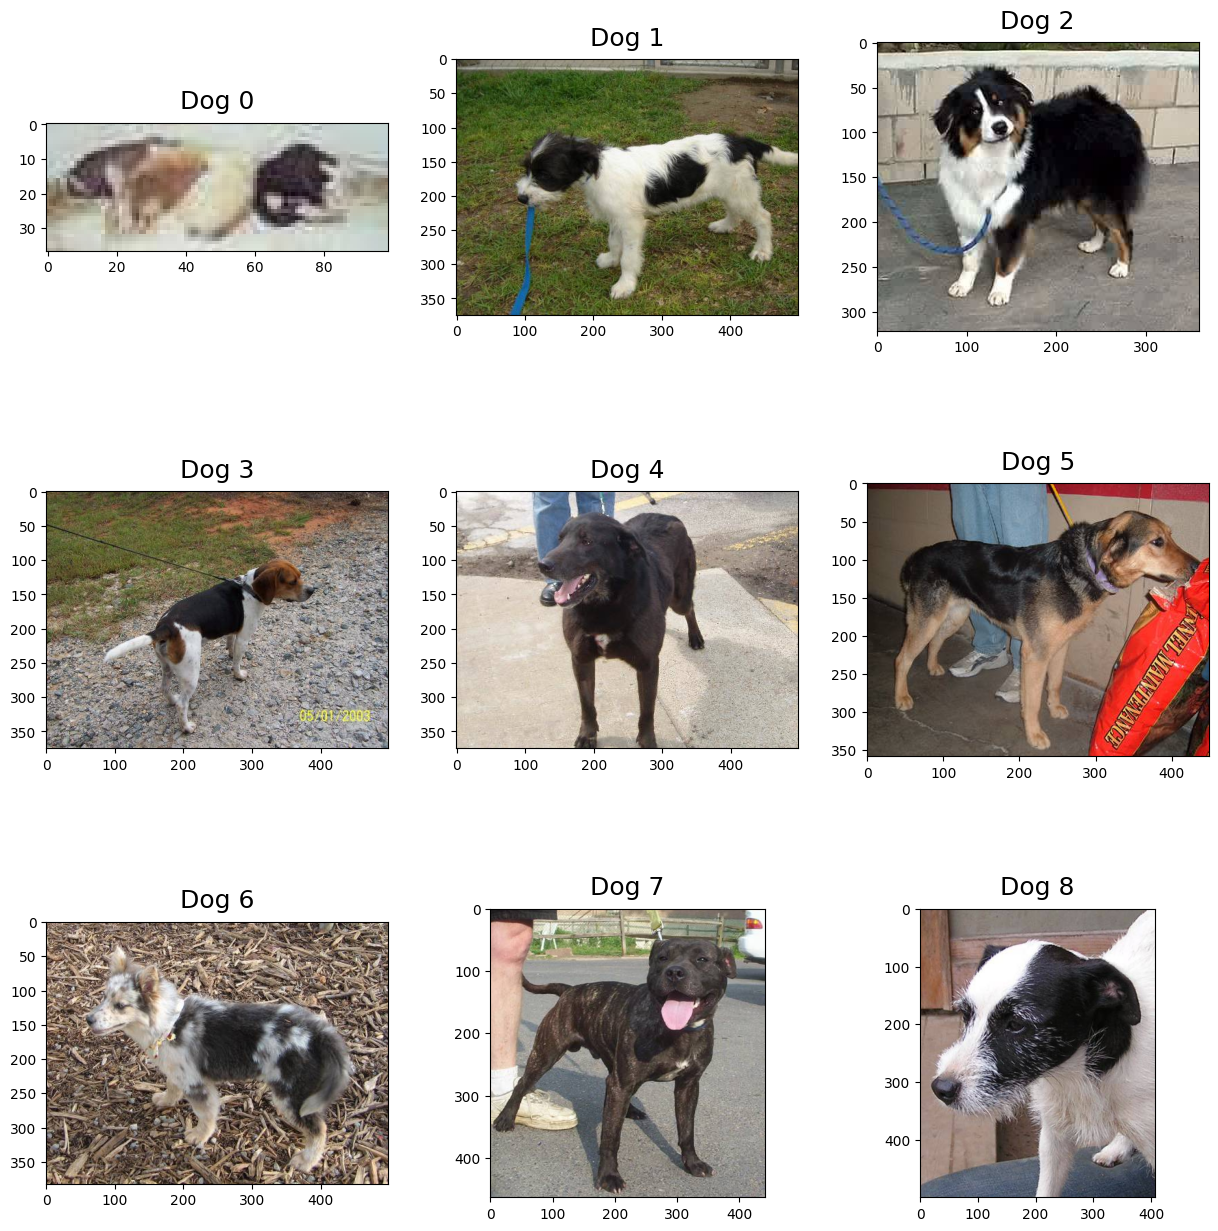

In [19]:
imagem_dogs = [cv2.imread(img_file) for img_file in random.sample(pasta_dogs, 9)]
imagem_dogs = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in imagem_dogs]
titulos = ['Dog ' + str(i) for i in range(9)]

showMultipleImages(imagem_dogs, titulos, (15, 15), 3, 3)

# AJUSTANDO DAS PASTAS DE TREINO, VALIDAÇAO E TESTE

# CONGIGURANDO NOME E DIRETORIO DAS PASTAS

In [20]:
pasta = "\\dados_cats_dogs"
pasta_treino = pasta_atual + pasta + "\\treino"
pasta_validacao = pasta_atual + pasta + "\\validacao"
pasta_teste = pasta_atual + pasta + "\\teste"

# CRIANDO AS PASTAS

In [21]:
os.mkdir(pasta_atual + pasta) #cria nova pasta do dataset
os.mkdir(pasta_treino) #cria nova pasta de treino
os.mkdir(pasta_validacao) #cria nova pasta de validação
os.mkdir(pasta_teste) #cria nova pasta de teste

pasta_treino_dog = pasta_treino + "\\dogs"
pasta_treino_cat = pasta_treino + "\\cats"
pasta_validacao_dog = pasta_validacao + "\\dogs"
pasta_validacao_cat = pasta_validacao + "\\cats"
pasta_teste_dog = pasta_teste + "\\dogs"
pasta_teste_cat = pasta_teste + "\\cats"

os.mkdir(pasta_treino_dog)
os.mkdir(pasta_treino_cat)
os.mkdir(pasta_validacao_dog)
os.mkdir(pasta_validacao_cat)
os.mkdir(pasta_teste_dog)
os.mkdir(pasta_teste_cat)

In [22]:
porcentagem_teste = 0.10
porcentagem_validacao = 0.20

def moveImagesToCorrectFolder():
    #lista dos arquivos onde encontram-se atualmente
    caminho_imagem_dog = glob.glob(pasta_original + 'dog.*')
    caminho_imagem_cat = glob.glob(pasta_original + 'cat.*')

    #para cada imagem de cachorro, mover para a pasta correta
    for caminho_imagem in caminho_imagem_dog:
        rand_val = random.random()
        nome_imagem = caminho_imagem.split("\\")[-1] #de um endereço como C:\\modelo\\img1.jpg, pega só o img1.jpg
        
        if rand_val <= porcentagem_teste: #10% das imagens vão para val
            shutil.move(caminho_imagem, pasta_validacao_dog + "\\" + nome_imagem) #move de origem para val de cachorro
        elif rand_val > porcentagem_teste and rand_val <= porcentagem_teste + porcentagem_validacao:
            shutil.move(caminho_imagem, pasta_teste_dog + "\\" + nome_imagem) #move de origem para teste de cachorro
        else:
            shutil.move(caminho_imagem, pasta_treino_dog + "\\" + nome_imagem) #move de origem para treino de cachorro

    #para cada imagem de gato, mover para a pasta correta
    for caminho_imagem in caminho_imagem_cat:
        rand_val = random.random()
        nome_imagem = caminho_imagem.split("\\")[-1] #de um endereço como C:\\modelo\\img1.jpg, pega só o img1.jpg
        
        if rand_val <= porcentagem_teste: #10% das imagens vão para val
            shutil.move(caminho_imagem, pasta_validacao_cat + "\\" + nome_imagem) #move de origem para val de gato
        elif rand_val > porcentagem_teste and rand_val <= porcentagem_teste + porcentagem_validacao:
            shutil.move(caminho_imagem, pasta_teste_cat + "\\" + nome_imagem) #move de origem para teste de gato
        else:
            shutil.move(caminho_imagem, pasta_treino_cat + "\\" + nome_imagem) #move de origem para treino de gato
        
moveImagesToCorrectFolder()
os.rmdir(pasta_original)